In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_up_BTC3.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BTC,up,2018-12-20 11:00:00,LincolnWDaniel,0,0,#Blockchain #Bitcoin #Bitcoin #Ethereum #Crypt...,11 Blockchain Projects Flaunting High-Profile ...
1,BTC,up,2018-12-20 11:00:00,ESPACIOBITVE,0,0,#Criptomonedas #Bitcoin #Bitcoin #BTC #BTC #Ma...,Compradores tradicionales cambian los mercado ...
2,BTC,up,2018-12-20 11:00:00,MoneroWith,0,0,#monero #monerocoin #bitcoin #bitcoin #mining,20 Dec 2018 - 18:00:00-Mining monero with time...
3,BTC,up,2018-12-20 11:00:00,CryptoHourly,0,0,NaN,"@#1, Bitcoin with unit price of $4,106.22, mar..."
4,BTC,up,2018-12-20 11:00:00,theforexacademy,0,0,#Bitcoin #Bitcoin,Check out the #Bitcoin Daily Forecast-http://b...
...,...,...,...,...,...,...,...,...
8518,BTC,up,2018-12-20 16:59:43,iamericwhite,0,0,#Tron #cryptocurrency #BTC #BTC #bitcoin #bitc...,Holding over 100k #Tron. Look to add a half mi...
8519,BTC,up,2018-12-20 16:59:45,KickerBTC,0,7,NaN,Bitcoin up while SPY dumping. I love it.
8520,BTC,up,2018-12-20 16:59:47,KenObrycki,0,0,NaN,BITCOIN NICE.
8521,BTC,up,2018-12-20 16:59:48,TheBookTweeters,0,0,#civics #ruleoflaw #education #Trump #trevorno...,Give the gift of facts! * Nonpartisan book * E...


In [5]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=str(x) ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [6]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [8]:
text['text']

0       [11, blockchain, projects, flaunting, high, pr...
1       [compradores, tradicionales, cambian, los, mer...
2       [20, dec, 2018, 18:00:00, mining, monero, with...
3       [@, 1, ,, bitcoin, with, unit, price, of, $, 4...
4       [check, out, the, bitcoin, daily, forecast, 2q...
                              ...                        
8518    [holding, over, 100k, tron, ., look, to, add, ...
8519    [bitcoin, up, while, spy, dumping, ., i, love,...
8520                                   [bitcoin, nice, .]
8521    [give, the, gift, of, facts, !, nonpartisan, b...
8522    [many, secure, and, user, friendly, crypto, cu...
Name: text, Length: 8523, dtype: object

In [9]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [13]:
text['text']

0       [blockchain, projects, flaunting, high, profil...
1       [compradores, tradicionales, cambian, los, mer...
2       [dec, mining, monero, time, break, monero, mon...
3       [,, bitcoin, unit, price, $, ,, market, cap, $...
4                       [check, bitcoin, daily, forecast]
                              ...                        
8518    [holding, tron, ., look, add, half, position, ...
8519                  [bitcoin, spy, dumping, ., love, .]
8520                                   [bitcoin, nice, .]
8521    [give, gift, facts, !, nonpartisan, book, easy...
8522    [many, secure, user, crypto, currency, exchang...
Name: text, Length: 8523, dtype: object

In [14]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [19]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [20]:
article_contents = tokenized_doc.values.tolist()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [22]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [23]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [24]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [25]:
word2id = defaultdict(lambda: 0)

In [26]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [27]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [28]:
len(tf_idf_result)

14147

In [29]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

14147


In [30]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

14147

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

14147

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

480.80629740171395

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0053715247112138265

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

8.129233843720483

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
567,"[0.4363650977611542, 1.6141383647918701, 1.629...",sell,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.000474,0.049795,0.950680,NaN
5448,"[0.49880728125572205, 1.9810765981674194, 2.03...",ratio,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.001122,0.029911,0.971211,NaN
3863,"[0.17001774907112122, 0.943114697933197, 0.928...",bitfinex,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.000363,0.012256,0.988107,NaN
1157,"[0.19344502687454224, 0.7661983966827393, 0.75...",arbitrage,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.001268,0.009599,0.991669,NaN
5452,"[0.12481098622083664, 0.4762386381626129, 0.47...",arbingtool,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.001839,0.008571,0.993269,NaN
5451,"[0.16548052430152893, 0.6242395639419556, 0.63...",arbitraj,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.003077,0.008571,0.994506,NaN
1056,"[0.09990343451499939, 0.5491014719009399, 0.54...",hitbtc,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.000317,0.005571,0.994746,NaN
1058,"[0.07072067260742188, 0.46710512042045593, 0.4...",kucoin,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.000949,0.005142,0.995806,NaN
5453,"[0.08476590365171432, 0.35541877150535583, 0.3...",vebitcoin,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.000804,0.003514,0.997290,NaN
1928,"[0.03496478870511055, 0.3251759111881256, 0.30...",koineks,0,"[0.016910542, 0.075111404, 0.07631872, -0.0014...",0.002027,0.003000,0.999027,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
278,"[-0.68204665184021, 1.172624111175537, 0.71319...",free,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.001356,0.022026,0.979330,NaN
23,"[-0.8097086548805237, 1.215797781944275, 0.616...",mine,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.003765,0.022712,0.981053,NaN
20,"[-0.8011184930801392, 1.3249298334121704, 0.76...",criptomonedas,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.001114,0.017312,0.983801,NaN
647,"[-0.6604703068733215, 1.1035118103027344, 0.71...",make,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.000370,0.015598,0.984772,NaN
1127,"[-0.5995323657989502, 1.0684336423873901, 0.67...",think,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.001148,0.015941,0.985207,NaN
986,"[-0.5792928338050842, 0.9853723049163818, 0.55...",short,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.001698,0.016370,0.985328,NaN
663,"[-0.6409180760383606, 1.017189621925354, 0.594...",good,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.000761,0.015427,0.985334,NaN
512,"[-0.6626961827278137, 1.10825514793396, 0.6941...",people,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.000134,0.014313,0.985822,NaN
55,"[-0.7059351801872253, 1.118072509765625, 0.613...",coin,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.002267,0.016198,0.986069,NaN
737,"[-0.580400288105011, 0.9377655386924744, 0.561...",youtube,1,"[-0.034048088, 0.05770137, 0.035574213, 0.0098...",0.000395,0.012770,0.987625,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8,"[-1.1449304819107056, 1.5526443719863892, 0.49...",bitcoin,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.002939,0.920302,0.082637,NaN
40,"[-1.0604220628738403, 1.2877167463302612, 0.22...",crypto,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.006937,0.225747,0.781189,NaN
10,"[-0.9711193442344666, 1.2127677202224731, 0.15...",cryptocurrency,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.010165,0.129758,0.880408,NaN
0,"[-1.0872454643249512, 1.4302691221237183, 0.41...",blockchain,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.005372,0.120159,0.885213,NaN
9,"[-0.917361855506897, 1.1100845336914062, 0.120...",ethereum,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.009734,0.089905,0.919829,NaN
29,"[-0.8862337470054626, 1.05997896194458, 0.0962...",price,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.025101,0.093419,0.931682,NaN
141,"[-1.0862427949905396, 1.0214123725891113, 0.18...",news,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.006568,0.062993,0.943575,NaN
30,"[-0.8557790517807007, 0.9972490072250366, 0.18...",market,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.014130,0.061622,0.952508,NaN
35,"[-0.9170423150062561, 0.9852344989776611, 0.37...",trade,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.024479,0.061965,0.962514,NaN
64,"[-0.9067681431770325, 1.066784381866455, 0.087...",cash,2,"[-0.06284826, 0.075661816, 0.024080066, 0.0249...",0.020350,0.052280,0.968070,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
538,"[-1.2369954586029053, 1.8696609735488892, 0.75...",major,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.001058,0.019112,0.981946,NaN
2587,"[-1.287833571434021, 1.9373499155044556, 0.730...",face,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.002285,0.018341,0.983944,NaN
1699,"[-1.0620357990264893, 1.5992425680160522, 0.60...",hurdle,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.003637,0.016370,0.987267,NaN
255,"[-1.0573558807373047, 1.59115731716156, 0.6107...",path,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.005147,0.017398,0.987749,NaN
3465,"[-0.2838050127029419, 0.41860103607177734, 0.1...",recovery,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.001724,0.002657,0.999067,NaN
10597,"[-0.031902946531772614, 0.043737318366765976, ...",collusion,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.016875,0.000257,1.016618,NaN
544,"[-0.0534268394112587, 0.06796503812074661, 0.0...",psychological,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.023892,0.000429,1.023464,NaN
70,"[-0.9421167373657227, 1.3067831993103027, 0.50...",bitcoins,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.038965,0.013799,1.025166,NaN
10598,"[-0.02323186583817005, 0.03305812180042267, 0....",probe,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.026423,0.000257,1.026166,NaN
6402,"[-0.022266065701842308, 0.029331235215067863, ...",polymath,3,"[-0.059563, 0.08780639, 0.033704113, 0.0328152...",0.027440,0.000257,1.027183,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

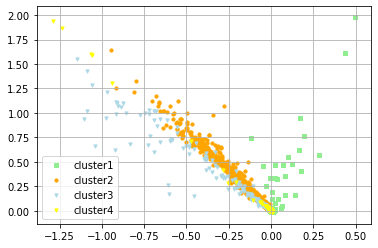

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소

174

In [64]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 비즈

12962

In [65]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 투자

882

In [66]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

129

In [67]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [68]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [69]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소

In [70]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 7 # 비즈

In [71]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 11 # 투자

In [72]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [73]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [74]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [75]:
kmeans.inertia_

1196.6817626953125

In [76]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 2 0 ... 0 0 0]


In [77]:
cluster_values= list(model.wv.vocab)

In [78]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1196.681884765625


In [79]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [80]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.783332


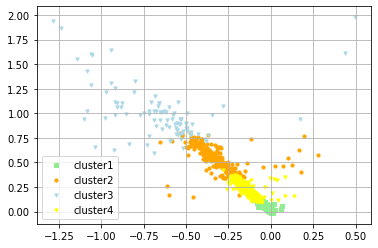

In [81]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [82]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [83]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [84]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [85]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [86]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [87]:
import scipy.spatial.distance as dist

In [88]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [89]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [90]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
161,"[-0.011737597174942493, 0.02949765883386135, 0...",bitcoinexchangebr,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.025806,0.000514,1.025291,NaN
7801,"[-0.017787082120776176, 0.028901515528559685, ...",autobayers,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.025793,0.000086,1.025707,NaN
12504,"[-0.017674002796411514, 0.029054874554276466, ...",pyramidale,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.026271,0.000086,1.026185,NaN
13699,"[-0.015762610360980034, 0.029184699058532715, ...",sewage,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.026308,0.000086,1.026222,NaN
11300,"[-0.017553385347127914, 0.0341234989464283, 0....",iotrecruiting,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.026430,0.000171,1.026258,NaN
4346,"[-0.018296783789992332, 0.029562782496213913, ...",ιστορικό,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.026600,0.000086,1.026514,NaN
9222,"[-0.022685930132865906, 0.03278658539056778, 0...",dick,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.026753,0.000171,1.026582,NaN
2855,"[-0.018476469442248344, 0.02971913479268551, 0...",käyttäjältä,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.026966,0.000257,1.026709,NaN
3438,"[-0.019124148413538933, 0.03528958186507225, 0...",a=coinok,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.026828,0.000086,1.026742,NaN
7159,"[-0.01899573765695095, 0.031246520578861237, 0...",kalıcılığı,0,"[-0.017847039, 0.030348793, 0.018796638, 0.005...",0.026965,0.000086,1.026879,NaN


In [91]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(50,'score') # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
175,"[-0.30501389503479004, 0.5225376486778259, 0.3...",base,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.087535,0.004714,1.082821,NaN
88,"[-0.3207303285598755, 0.533600389957428, 0.286...",仮想通貨,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.100298,0.004457,1.095841,NaN
1373,"[-0.32656916975975037, 0.5232586860656738, 0.3...",block,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.138190,0.004885,1.133305,NaN
643,"[-0.34615424275398254, 0.5291581749916077, 0.2...",interest,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.151277,0.006428,1.144849,NaN
529,"[-0.2868559956550598, 0.48649993538856506, 0.3...",plan,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.152217,0.003685,1.148532,NaN
2184,"[-0.3073376715183258, 0.5266640186309814, 0.30...",twitter,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.156294,0.006514,1.149781,NaN
2000,"[-0.29489460587501526, 0.5168888568878174, 0.3...",many,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.165096,0.004714,1.160382,NaN
1187,"[-0.31517156958580017, 0.48673176765441895, 0....",feed,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.169042,0.004200,1.164843,NaN
550,"[-0.34367311000823975, 0.5461946725845337, 0.3...",euro,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.177857,0.005228,1.172629,NaN
44,"[-0.30581313371658325, 0.5132315158843994, 0.2...",satoshi,1,"[-0.30531603, 0.5149038, 0.29576713, 0.0985614...",0.177210,0.004114,1.173096,NaN


In [92]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 사회,비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
887,"[-0.6333382725715637, 1.0191996097564697, 0.52...",token,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.325457,0.014741,1.310715,NaN
197,"[-0.6568445563316345, 1.0172215700149536, 0.54...",take,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.431157,0.014570,1.416587,NaN
663,"[-0.6409180760383606, 1.017189621925354, 0.594...",good,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.439651,0.015427,1.424225,NaN
986,"[-0.5792928338050842, 0.9853723049163818, 0.55...",short,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.515189,0.016370,1.498819,NaN
91,"[-0.6671617031097412, 1.071972370147705, 0.621...",bank,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.539539,0.011742,1.527798,NaN
436,"[-0.7195491194725037, 1.0248106718063354, 0.40...",altcoins,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.563352,0.014998,1.548354,NaN
55,"[-0.7059351801872253, 1.118072509765625, 0.613...",coin,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.606873,0.016198,1.590675,NaN
72,"[-0.7206658720970154, 0.9937967658042908, 0.38...",cryptocurrencies,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.643769,0.019884,1.623886,NaN
737,"[-0.580400288105011, 0.9377655386924744, 0.561...",youtube,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.672322,0.012770,1.659552,NaN
512,"[-0.6626961827278137, 1.10825514793396, 0.6941...",people,2,"[-0.6547895, 1.0033948, 0.5185664, 0.23108456,...",0.700218,0.014313,1.685905,NaN


In [93]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
767,"[-0.10929882526397705, 0.19426321983337402, 0....",important,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.028915,0.000943,1.027972,NaN
1808,"[-0.10947176069021225, 0.18854855000972748, 0....",sont,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.035691,0.000600,1.035091,NaN
2161,"[-0.11082258820533752, 0.1968696415424347, 0.1...",voor,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.036967,0.000686,1.036281,NaN
830,"[-0.11476752161979675, 0.18579800426959991, 0....",authority,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.037707,0.001114,1.036592,NaN
2985,"[-0.11052528023719788, 0.1864832192659378, 0.1...",shitcoin,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.038119,0.001200,1.036919,NaN
1135,"[-0.11947064101696014, 0.19252413511276245, 0....",quickxprotocol,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.038579,0.001200,1.037379,NaN
2634,"[-0.11176449060440063, 0.18697108328342438, 0....",için,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.038293,0.000686,1.037607,NaN
6112,"[-0.11927568912506104, 0.1945859044790268, 0.1...",ecommerce,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.039774,0.000943,1.038831,NaN
2218,"[-0.11413000524044037, 0.19327618181705475, 0....",cost,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.041105,0.001200,1.039905,NaN
1593,"[-0.11485110223293304, 0.18803717195987701, 0....",hmrc,3,"[-0.11361848, 0.19142196, 0.11568362, 0.034170...",0.041279,0.001286,1.039993,NaN


In [98]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #인플

12664

In [99]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #기술

289

In [100]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #비즈

95

In [101]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #이슈

1099

In [102]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [103]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플

In [104]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 9 # 기술

In [105]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 7 # 비즈

In [106]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 5 # 이슈

In [107]:
temp_cluster_result1['Silhouette'] = 0.783332
temp_cluster_result['Silhouette'] = 0.783332
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [108]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_BTC3_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_BTC3_cosine")